In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


THE ABOVE CODE IS TO IMPORT DATASETS **EASILY
BUT ITS IN ZIP FORMAT
SO WE NEED TO UNZIP IT

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

**IMPORT LIBRARIES**

```

```



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
#Used in keras
#It divides entire data into batches
#They process large amount of data
#Here we'll use image dataset.directory
#Here, we will use 2 types:one for training and testing
train_ds=keras.utils.image_dataset_from_directory(
                                                 directory='/content/train',
                                                  labels='inferred',
                                                 label_mode='int',#integer to have 0 or 1 for cats and dogs
                                                  batch_size=32,
                                                  image_size=(256,256)
                                                  )
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#NORMALISATION
#As the above data is in numpy array from where it has 0-255 images
#but, we want it for 0-1 , so we normalise it to 0-1 by div with 255
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
vaidation_ds=validation_ds.map(process)

In [ ]:
#CREATE CNN MODEL
#It has 3 layers 1st:32, 2nd:64, 3rd:128
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))#Note here it is 32
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))#Note here it is 64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))#Note here it is 128
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))#Note, here it is output, so it is sigmoid and we made it to 1(which stands for dogs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)#Make sure that in runtime option at top, set it to gui

Epoch 1/10
625/625 [==============================] - 73s 102ms/step - loss: 1.5347 - accuracy: 0.5770 - val_loss: 51.3946 - val_accuracy: 0.5258
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5878 - accuracy: 0.6878 - val_loss: 257.6909 - val_accuracy: 0.5076
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5053 - accuracy: 0.7557 - val_loss: 193.8711 - val_accuracy: 0.5440
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4398 - accuracy: 0.7979 - val_loss: 124.9057 - val_accuracy: 0.5754
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3740 - accuracy: 0.8314 - val_loss: 93.6958 - val_accuracy: 0.6826
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3133 - accuracy: 0.8648 - val_loss: 52.7609 - val_accuracy: 0.7366
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2401 - accuracy: 0.9010 - val_loss: 104.89

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/Screenshot (60).png')#imread-->image read

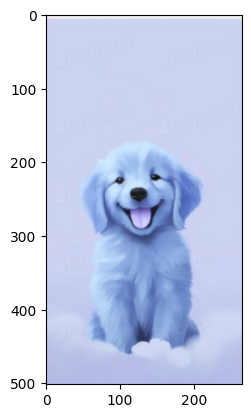

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(502, 266, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape(1,256,256,3)#cnverting into 4d array, where it consists of 1 image with 256*256 pixels with 3 layers

In [ ]:
y=model.predict(test_input)
if y==0:
  print('Its a dog ')
elif y==1:
  print('Its a cat ')
else:
  print('None')

1/1 [==============================] - 0s 18ms/step
Its a dog 
